<a href="https://colab.research.google.com/github/eunzzae/PJT_C.lab/blob/main/240114_%5B%EA%B8%B0%EC%97%85%EC%97%B0%EA%B3%84PJT%5D_%ED%8C%A8%EC%85%98%EC%B6%94%EC%B2%9C_%EB%AA%A8%EB%8D%B8%EB%A7%81(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [ ]:
import os

from math import sqrt
from tqdm import tqdm_notebook as tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder




### 항목명    설명  


* E_id : 평가 data ID  
* imgName : 이미지 filename  
* era : 시대별  
* style : 스타일별  
* gender : 이미지 성별  
* R_id : 응답자 ID  
* r_gender : 응답자 성별  
* age : 연령  
* mar : 결혼상태  
* job : 직업  
* income : 월소득액  
* r_style1 : 패션스타일1  
* r_style2 : 패션스타일2  
* r_style3 : 패션스타일3  
* r_style4 : 패션스타일4  
* r_style5 : 패션스타일5  
* Q1 : 스타일 선호도  
* Q2 : 어울리는 계절  
* Q3 : 적합한 착용 상황  
* Q411 : (핏) 평가  
* Q412 : (색깔) 어두움-밝음  
* Q413 : (색감) 차가움-따뜻함  
* Q414 : (분위기) 무거움-가벼움  
* Q4201 : (이미지단어) 멋있다  
* Q4202 : (이미지단어) 도시적이다  
* Q4203 : (이미지단어) 트랜디하다  
* Q4204 : (이미지단어) 세련되다  
* Q4205 : (이미지단어) 깔끔하다  
* Q4206 : (이미지단어) 화려하다  
* Q4207 : (이미지단어) 독특하다
* Q4208 : (이미지단어) 무난하다
* Q4209 : (이미지단어) 개방적이다
* Q4210 : (이미지단어) 실용적이다
* Q4211 : (이미지단어) 활동적이다
* Q4212 : (이미지단어) 편안하다
* Q4213 : (이미지단어) 발랄하다
* Q4214 : (이미지단어) 여성적이다
* Q4215 : (이미지단어) 남성적이다
* Q4216 : (이미지단어) 부드럽다
* Q5 : 스타일 선호도(재질문)

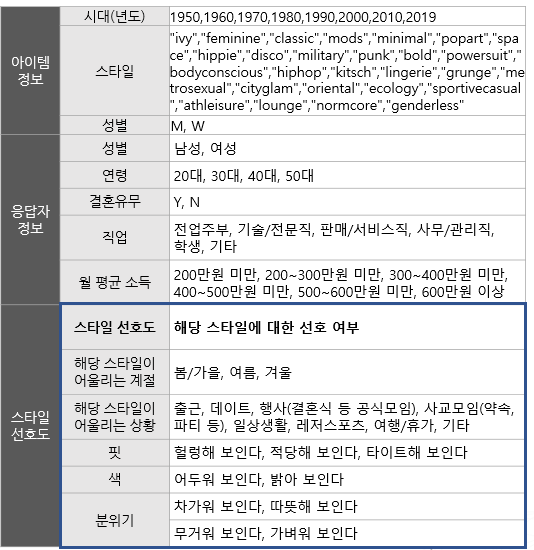

In [ ]:
## 밑에 plot 한글 글씨체 안 깨지게, 나눔글씨체 다운로드 하는 방법
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 사용 가능한 폰트 목록 확인
for font in fm.fontManager.ttflist:
    print(font.name)

STIXSizeFiveSym
STIXGeneral
DejaVu Sans Mono
STIXNonUnicode
DejaVu Sans
DejaVu Serif
STIXSizeTwoSym
cmtt10
DejaVu Serif
cmss10
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
STIXNonUnicode
STIXGeneral
DejaVu Sans Display
DejaVu Sans
DejaVu Sans Mono
STIXSizeOneSym
DejaVu Sans Mono
DejaVu Sans
STIXGeneral
STIXSizeFourSym
cmb10
cmmi10
STIXSizeOneSym
DejaVu Serif
STIXNonUnicode
STIXSizeThreeSym
STIXGeneral
cmr10
cmsy10
DejaVu Sans
cmex10
STIXNonUnicode
STIXSizeFourSym
STIXSizeThreeSym
STIXSizeTwoSym
NanumGothicCoding
NanumGothicCoding
Liberation Sans
Liberation Serif
Liberation Sans Narrow
NanumMyeongjo
NanumBarunGothic
Humor Sans
Liberation Mono
Liberation Sans
Liberation Mono
NanumSquareRound
Liberation Mono
Liberation Mono
NanumBarunGothic
NanumSquareRound
NanumSquare
NanumSquare
Liberation Serif
NanumGothic
Liberation Sans Narrow
Liberation Serif
Liberation Sans
Liberation Sans Narrow
Liberation Sans
Liberation Sans Narrow
NanumGothic
NanumMyeongjo
Liberation Serif


In [ ]:
plt.rcParams["font.family"] = 'NanumGothic'

In [ ]:
import os
import pandas as pd
import numpy as np
from math import sqrt
from tqdm import tqdm_notebook as tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import matplotlib as mpl
%matplotlib inline

# 0. Dataset 불러오기

In [ ]:
# 각자 작업 환경에 맞는 경로를 지정해주세요. Google Colab과 Jupyter환경에서 경로가 다를 수 있습니다.
path = '/content/drive/MyDrive/Colab Notebooks/data/connects_lab'
base_df = pd.read_csv(os.path.join(path, 'base_df.csv'), encoding='utf-8',error_bad_lines=False) #error_bad_lines 무시


<ipython-input-60-cee3999c036c>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  base_df = pd.read_csv(os.path.join(path, 'base_df.csv'), encoding='utf-8',error_bad_lines=False) #error_bad_lines 무시


# base_df 불러오기

In [ ]:
# base_df 불러오기
base_df.head()

,R_id,E_id_x,imgName_x,r_gender,age,mar,job,income,r_style1,r_style2,...,개방적임,실용적임,활동적임,편안함,발랄함,여성적임,남성적임,부드러움,선호도(재질문),응답내용
0,66640,201566,T_00003_19_normcore_M.jpg,남자,50대,미혼,사무/관리직,300-400만원 미만,무난/평범,중성적,...,개방적이지 않음,실용적임,활동적임,편안함,발랄함,여성적이지 않음,남성적이지 않음,부드럽지 않음,선호,선호_봄/가을_데이트_헐렁해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있지 않음_...
1,66640,201566,T_00003_19_normcore_M.jpg,남자,50대,미혼,사무/관리직,300-400만원 미만,무난/평범,중성적,...,개방적이지 않음,실용적임,활동적임,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드러움,선호,선호_봄/가을_일상생활_헐렁해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있지 않음...
2,66640,201566,T_00003_19_normcore_M.jpg,남자,50대,미혼,사무/관리직,300-400만원 미만,무난/평범,중성적,...,개방적이지 않음,실용적임,활동적임,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,비선호,비선호_봄/가을_일상생활_헐렁해 보임_밝아 보임_따뜻해 보임_무거워 보임_멋있지 않...
3,66640,201566,T_00003_19_normcore_M.jpg,남자,50대,미혼,사무/관리직,300-400만원 미만,무난/평범,중성적,...,개방적이지 않음,실용적임,활동적이지 않음,편안하지 않음,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,비선호,비선호_봄/가을_출근_헐렁해 보임_어두워 보임_차가워 보임_무거워 보임_멋있지 않음...
4,66640,201566,T_00003_19_normcore_M.jpg,남자,50대,미혼,사무/관리직,300-400만원 미만,무난/평범,중성적,...,개방적이지 않음,실용적임,활동적임,편안함,발랄함,여성적이지 않음,남성적이지 않음,부드러움,선호,선호_여름_여행/휴가_헐렁해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있지 않음_...


In [ ]:
base_df.columns.tolist()

['R_id',
 'E_id_x',
 'imgName_x',
 'r_gender',
 'age',
 'mar',
 'job',
 'income',
 'r_style1',
 'r_style2',
 'r_style3',
 'r_style4',
 'r_style5',
 '어울리는 계절',
 '적합한 상황',
 '핏(평가)',
 '색깔',
 '색감',
 '분위기',
 '멋있음',
 '도시적임',
 '트랜디함',
 '세련됨',
 '깔끔함',
 '화려함',
 '독특함',
 '무난함',
 '개방적임',
 '실용적임',
 '활동적임',
 '편안함',
 '발랄함',
 '여성적임',
 '남성적임',
 '부드러움',
 '선호도(재질문)',
 '응답내용']

In [ ]:
# 현재 피처 이름 출력
print('변경 전 피처 이름:', base_df.columns.tolist())

# 피처 이름 변경할 매핑 딕셔너리 생성
new_names = {
    'R_id' : 'R_id',
    'E_id' : 'E_id',
    'imgName' : 'imgName',
    '선호여부' : 'preference',
    '어울리는 계절':'season',
    '적합한 상황' : 'situation',
    '핏(평가)' : 'fit',
    '색깔' : 'color',
    '색감': 'scheme',
    '분위기' : 'mood',
    '멋있음' : 'cool',
    '도시적임' : 'urbanity',
    '트랜디함' : 'trendiness',
    '세련됨' : 'elegance',
    '깔끔함' :'neatness',
    '화려함' : 'splendor',
    '독특함' : 'uniqueness',
    '무난함': 'simplicity',
    '개방적임' : 'openness',
    '실용적임' :'practicality',
    '활동적임' : 'activeness',
    '편안함' : 'comfort',
    '발랄함' : 'vivacity',
    '여성적임' : 'femininity',
    '남성적임' : 'masculinity',
    '부드러움' : 'softness',
    '선호도(재질문)' : 'repreference'
}

# 피처 이름 변경
base_df.rename(columns=new_names, inplace=True)

# 변경된 피처 이름 출력
print('변경 후 피처 이름:', base_df.columns.tolist())

변경 전 피처 이름: ['R_id', 'E_id_x', 'imgName_x', 'r_gender', 'age', 'mar', 'job', 'income', 'r_style1', 'r_style2', 'r_style3', 'r_style4', 'r_style5', '어울리는 계절', '적합한 상황', '핏(평가)', '색깔', '색감', '분위기', '멋있음', '도시적임', '트랜디함', '세련됨', '깔끔함', '화려함', '독특함', '무난함', '개방적임', '실용적임', '활동적임', '편안함', '발랄함', '여성적임', '남성적임', '부드러움', '선호도(재질문)', '응답내용']
변경 후 피처 이름: ['R_id', 'E_id_x', 'imgName_x', 'r_gender', 'age', 'mar', 'job', 'income', 'r_style1', 'r_style2', 'r_style3', 'r_style4', 'r_style5', 'season', 'situation', 'fit', 'color', 'scheme', 'mood', 'cool', 'urbanity', 'trendiness', 'elegance', 'neatness', 'splendor', 'uniqueness', 'simplicity', 'openness', 'practicality', 'activeness', 'comfort', 'vivacity', 'femininity', 'masculinity', 'softness', 'repreference', '응답내용']


### train, test set 분할

In [ ]:
# train set, test set 분할
train_df, test_df = train_test_split(base_df, test_size=0.2, random_state=0)

print(train_df.shape)
print(test_df.shape)

(242620, 37)
(60656, 37)


# 3. 내용 정리 (모델링)
* raw 수 > user 수 => 한 user가 여러 제품을 피드백
* item 수 > user 수 => user-based CF 모델, contents based 모델
* 결측값 있는 컬럼 => 없음
* 범주형 변수 많음 => item 설명변수 많음(=contents based)


## 목표 : user가 선호하는 패션제품을 추천해서 구매를 유도하기!

- (1)item수>user수 = user기반 모델 활용하기 = "user-based CF 유사도"
- (2)item수 많음,설명변수 많음 = contents based = "contents based 유사도"

#### 가설 1 : 선호하는 <u>제품 간 유사도</u>를 통해 **'유저가 선호하는 제품과 유사한 제품'** 추천

#### 가설 2 : 선호하는 제품이 비슷한 <u>고객 간 유사도</u>를 통해 **'구매할 것 같은 제품'** 추천

#### 가설 3 : <u>제품의 특징</u>을 통해 **'이미 선호하는 제품과 유사한 제품'** 추천

### 가설 1
: 선호하는 제품 간 유사도를 통해 '유저가 선호하는 제품과 유사한 제품' 추천
* 1-1) 선호하는 고객과 선호대상 제품 간 matrix 형성(고객X제품)
* 1-2) 해당 matrix로 고객 간 유사도 측정(item_based CF 모델링)
* 1-3) output : 각 고객별로 제품 추천

### 가설 2
: 선호하는 제품이 비슷한 고객 간 유사도를 통해 '구매할 것 같은 제품' 추천
* 2-1) 선호하는 고객과 선호대상 제품 간 matrix 형성(고객X제품)
* 2-2) 해당 matrix로 고객 간 유사도 측정(user_based CF 모델링)
* 2-3) output : 각 고객별로 제품 추천

### 가설 3
: 제품의 특징을 통해 '이미 선호하는 제품과 유사한 제품' 추천
* 3-1) 선호하는 데이터 전처리 및 제품 특징 벡터화(Only 제품)
* 3-2) 해당 제품 간 특징 유사도 측정(contents based recommendation 모델링)
* 3-3) output : 각 고객별로 제품 추천

### (1) Sparse  matrix 생성 (fill 0)

In [ ]:
# 사용자-제품 관계를 나타내는 DataFrame 생성 (선호도가 1, 0 일 때)
user_product_df = train_df[['R_id','imgName_x','repreference']].copy()
user_product_df = user_product_df.rename(columns={'repreference':'purchase'})
user_product_df.head()

,R_id,imgName_x,purchase
196077,65662,T_05560_19_normcore_W.jpg,선호
272284,26337,W_38486_19_normcore_W.jpg,선호
270162,61669,W_66708_19_normcore_W.jpg,비선호
86288,42863,T_19887_19_normcore_M.jpg,선호
109815,64364,W_25241_19_normcore_M.jpg,비선호


In [ ]:
# 'purchase' 컬럼 값 변경(구매 : 1, 비구매 : 0)
user_product_df['purchase'] = user_product_df['purchase'].map({'선호': 1, '비선호': 0})

# 변경된 데이터프레임 확인
print(user_product_df)

         R_id                  imgName_x  purchase
196077  65662  T_05560_19_normcore_W.jpg         1
272284  26337  W_38486_19_normcore_W.jpg         1
270162  61669  W_66708_19_normcore_W.jpg         0
86288   42863  T_19887_19_normcore_M.jpg         1
109815  64364  W_25241_19_normcore_M.jpg         0
...       ...                        ...       ...
211543  67696  T_14896_19_normcore_W.jpg         1
86293   42863  T_19887_19_normcore_M.jpg         0
122579  64642  W_26138_19_normcore_M.jpg         1
152315  41210  W_79406_19_normcore_M.jpg         0
117952  62465  W_17578_19_normcore_M.jpg         1

[242620 rows x 3 columns]


In [ ]:
# 'purchase' 컬럼이 '선호' 값에 해당하는 데이터 필터링
user_product_df = user_product_df[user_product_df['purchase'] == 1]

# groupby 형태로 변환
userid_grouped = user_product_df.groupby('imgName_x')
print(userid_grouped.count())

                             R_id  purchase
imgName_x                                  
T_00003_19_normcore_M.jpg       4         4
T_00007_19_normcore_M.jpg       5         5
T_00008_19_normcore_M.jpg       2         2
T_00010_19_normcore_M.jpg       5         5
T_00011_19_normcore_M.jpg       2         2
...                           ...       ...
W_96426_19_genderless_W.jpg    11        11
W_96472_19_lounge_W.jpg        13        13
W_96487_19_lounge_W.jpg        12        12
W_96507_19_lounge_W.jpg        13        13
W_96574_19_normcore_W.jpg       2         2

[23048 rows x 2 columns]


In [ ]:
# groupby 형태로 변환
userid_grouped = user_product_df.groupby('R_id')
print(userid_grouped.count())

       imgName_x  purchase
R_id                      
12            39        39
25            12        12
26            33        33
27            10        10
30            17        17
...          ...       ...
68961        409       409
68966        924       924
68969        218       218
68976         32        32
68983         68        68

[4327 rows x 2 columns]


In [ ]:
from scipy.sparse import csr_matrix

sparse_matrix = user_product_df.groupby(['imgName_x', 'R_id']).apply(lambda x : 1 if x.shape[0] > 0 else 0).unstack()
sparse_matrix.index.name = 'imgName_x'
sparse_matrix

R_id,12,25,26,27,30,53,67,81,133,139,...,68569,68570,68571,68573,68575,68961,68966,68969,68976,68983
imgName_x,,,,,,,,,,,,,,,,,,,,,
T_00003_19_normcore_M.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_00007_19_normcore_M.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_00008_19_normcore_M.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_00010_19_normcore_M.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_00011_19_normcore_M.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W_96426_19_genderless_W.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W_96472_19_lounge_W.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W_96487_19_lounge_W.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# NaN이 아닌 원소들에 대해 True를 가지는 불리언 데이터프레임을 얻습니다.
non_na_boolean_matrix = sparse_matrix.notna()

# 각 원소가 NaN이 아닌 경우 1로, NaN인 경우 0으로 취급하여 합계를 계산합니다.
non_na_count = non_na_boolean_matrix.sum().sum()

print(f"NaN이 아닌 값의 개수: {non_na_count}")

# sparse_matrix의 모든 값을 1차원 배열로 변환합니다.
values = sparse_matrix.values.flatten()

# values에서 값의 빈도를 센 후, Series 형태로 반환합니다.
value_counts = pd.Series(values).value_counts()

print(value_counts)


NaN이 아닌 값의 개수: 28566
1.0    28566
dtype: int64


#### 왜이렇게 Nan값이 많은걸까? => (sparse) 제대로 만들어 졌는지 확인

In [ ]:
# R_id로 group by하여 각 사용자의 구매한 제품개수 계산
product_counts = user_product_df.groupby('R_id')['imgName_x'].count()

# 개수를 기준으로 내림차순 정렬
product_counts_sorted = product_counts.sort_values(ascending=False)

# 결과 출력
print(product_counts_sorted)


R_id
68555    1028
46506     981
68966     924
27385     876
54952     866
         ... 
64973       1
66596       1
67831       1
65568       1
66773       1
Name: imgName_x, Length: 4327, dtype: int64


In [ ]:
user_counts = user_product_df.groupby('imgName_x')['R_id'].count()

# Sort the counts in descending order
user_counts_sorted = user_counts.sort_values(ascending=False)

# Print the results
print(user_counts_sorted)


imgName_x
T_17691_19_normcore_M.jpg    39
W_23917_19_normcore_M.jpg    39
W_25399_19_normcore_M.jpg    38
W_25487_19_normcore_M.jpg    37
W_12161_19_normcore_M.jpg    37
                             ..
T_08198_19_normcore_W.jpg     1
T_08195_19_normcore_W.jpg     1
W_31224_19_normcore_M.jpg     1
W_68661_19_normcore_W.jpg     1
T_17172_19_normcore_M.jpg     1
Name: R_id, Length: 23048, dtype: int64


## 가설1, 이미 구매된 제품간 유사도 활용(item-based cf) 제품 추천하기

### (2)item-based cosine similarity matrix 만들기

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def cossim_matrix(a, b):
    cossim_values = cosine_similarity(a.values, b.values)
    cossim_df = pd.DataFrame(data=cossim_values, columns=a.index.values, index=a.index)

    return cossim_df

In [ ]:
item_sparse_matrix = sparse_matrix.fillna(0)

item_cossim_df = cossim_matrix(item_sparse_matrix, item_sparse_matrix)

item_cossim_df

,T_00003_19_normcore_M.jpg,T_00007_19_normcore_M.jpg,T_00008_19_normcore_M.jpg,T_00010_19_normcore_M.jpg,T_00011_19_normcore_M.jpg,T_00012_19_normcore_M.jpg,T_00014_19_normcore_M.jpg,T_00024_19_normcore_M.jpg,T_00026_19_normcore_M.jpg,T_00029_19_normcore_M.jpg,...,W_96208_19_lounge_W.jpg,W_96214_19_lounge_W.jpg,W_96304_19_genderless_W.jpg,W_96332_19_lounge_W.jpg,W_96392_19_lounge_W.jpg,W_96426_19_genderless_W.jpg,W_96472_19_lounge_W.jpg,W_96487_19_lounge_W.jpg,W_96507_19_lounge_W.jpg,W_96574_19_normcore_W.jpg
imgName_x,,,,,,,,,,,,,,,,,,,,,
T_00003_19_normcore_M.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T_00007_19_normcore_M.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T_00008_19_normcore_M.jpg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T_00010_19_normcore_M.jpg,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T_00011_19_normcore_M.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W_96426_19_genderless_W.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
W_96472_19_lounge_W.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
W_96487_19_lounge_W.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
imgName_x = 'T_19170_19_normcore_M.jpg'
extracted_rows = base_df[base_df['imgName_x'] == imgName_x].copy()

In [ ]:
# 상품
print(extracted_rows[['R_id','r_gender','age','mar','job','income']])


        R_id r_gender  age mar     job        income
19122  68966       남자  50대  미혼  사무/관리직      600만원 이상
19123  68966       남자  50대  미혼  사무/관리직      600만원 이상
19124  68966       남자  50대  미혼  사무/관리직      600만원 이상
19125  68966       남자  50대  미혼  사무/관리직      600만원 이상
19126  68966       남자  50대  미혼  사무/관리직      600만원 이상
...      ...      ...  ...  ..     ...           ...
27874  55798       남자  40대  미혼  사무/관리직  300-400만원 미만
27875  55798       남자  40대  미혼  사무/관리직  300-400만원 미만
27876  55798       남자  40대  미혼  사무/관리직  300-400만원 미만
27877  55798       남자  40대  미혼  사무/관리직  300-400만원 미만
27878  55798       남자  40대  미혼  사무/관리직  300-400만원 미만

[254 rows x 6 columns]


In [ ]:
#실 데이터 확인(보편적인 상황)
nonzero_values = item_cossim_df.loc[imgName_x, :].to_numpy().nonzero()[0]
print(f"[상품번호{imgName_x}]와 유사 구매된 제품 번호: {nonzero_values}")


[상품번호T_19170_19_normcore_M.jpg]와 유사 구매된 제품 번호: [  823  4670  4715  4891  4892  5187  5188  5310  5311  6239  6240  6241
  6242  6243  6244  6245  6246  6247  6248  8400  8870  8872  9586  9775
  9785 10251 10619 11625 11919 11934 11989 12027 12088 12165 12584 12854
 16435 16558 16677 16789 17343 17404 17671 17715 18162 18313 18542 18951
 19125 19141 19199 19233 19299 19562 21758 21761 21764 21767]


In [ ]:
#item_prediction_result_df 결과값 만들기 (일단 빈 행렬 만들기)
'''
index: user_id (4227  명)
columns: 모든 product_id (5871 개)
'''

item_prediction_result_df = pd.DataFrame(index=list(userid_grouped.indices.keys()), columns=item_sparse_matrix.index)
item_prediction_result_df

imgName_x,T_00003_19_normcore_M.jpg,T_00007_19_normcore_M.jpg,T_00008_19_normcore_M.jpg,T_00010_19_normcore_M.jpg,T_00011_19_normcore_M.jpg,T_00012_19_normcore_M.jpg,T_00014_19_normcore_M.jpg,T_00024_19_normcore_M.jpg,T_00026_19_normcore_M.jpg,T_00029_19_normcore_M.jpg,...,W_96208_19_lounge_W.jpg,W_96214_19_lounge_W.jpg,W_96304_19_genderless_W.jpg,W_96332_19_lounge_W.jpg,W_96392_19_lounge_W.jpg,W_96426_19_genderless_W.jpg,W_96472_19_lounge_W.jpg,W_96487_19_lounge_W.jpg,W_96507_19_lounge_W.jpg,W_96574_19_normcore_W.jpg
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### (3)사용자들의 item별 구매 확률 예측하기

(1)에서 만든 userId_grouped 와 sparse matrix

(2)에서 만든 item_cossim_df  
(3)에서 만들 최종 예측 matrix : item_prediction_result_df

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 사용자-구매 이력 데이터를 기반으로 각 유저들의 제품에 대한 구매력 예측
def predict_purchase_itembased(userid_grouped, item_cossim_df,item_prediction_result_df):
    '''
     - user_product_df : 전체 traindata set에서 user_id,imgName_x, purchase 컬럼만 뽑음
     - item_cossim_df : 1,0으로 만들어진 구매이력 matrix
    '''

    for userid, group in tqdm(userid_grouped):
        user_sim = item_cossim_df.loc[group['imgName_x']]
        user_purchase = group['purchase']
        sim_sum = user_sim.sum(axis=0)

        if sim_sum.empty or sim_sum.values[0] == 0:
            continue

        pred_puchased = np.matmul(user_sim.T.to_numpy(), user_purchase) / (sim_sum+1)
        item_prediction_result_df.loc[userid] = pred_puchased


    return item_prediction_result_df



# 사용자-구매 이력 데이터를 기반으로 구매 예측 수행
item_prediction_result_df = predict_purchase_itembased(userid_grouped, item_cossim_df,item_prediction_result_df)

<ipython-input-79-b5ebedd539e6>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userid, group in tqdm(userid_grouped):


  0%|          | 0/4327 [00:00<?, ?it/s]

In [ ]:
item_prediction_result_df

imgName_x,T_00003_19_normcore_M.jpg,T_00007_19_normcore_M.jpg,T_00008_19_normcore_M.jpg,T_00010_19_normcore_M.jpg,T_00011_19_normcore_M.jpg,T_00012_19_normcore_M.jpg,T_00014_19_normcore_M.jpg,T_00024_19_normcore_M.jpg,T_00026_19_normcore_M.jpg,T_00029_19_normcore_M.jpg,...,W_96208_19_lounge_W.jpg,W_96214_19_lounge_W.jpg,W_96304_19_genderless_W.jpg,W_96332_19_lounge_W.jpg,W_96392_19_lounge_W.jpg,W_96426_19_genderless_W.jpg,W_96472_19_lounge_W.jpg,W_96487_19_lounge_W.jpg,W_96507_19_lounge_W.jpg,W_96574_19_normcore_W.jpg
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
imgName_x = 'T_19170_19_normcore_M.jpg'
nonzero_values_rec_result = item_prediction_result_df[item_prediction_result_df.index == imgName_x].to_numpy().nonzero()[1]
print(f"[상품번호{imgName_x}]와 유사 구매된 제품 번호 추천 결과: {nonzero_values_rec_result}")


[상품번호T_19170_19_normcore_M.jpg]와 유사 구매된 제품 번호 추천 결과: []


In [ ]:
imgName_x = 'T_19170_19_normcore_M.jpg'
extracted_rows = base_df[base_df['imgName_x']==(imgName_x)].copy()

# 실제 해당 상품(을 산 사람들 정보)
print(extracted_rows[['R_id','r_gender','age','mar','job','income']])

        R_id r_gender  age mar     job        income
19122  68966       남자  50대  미혼  사무/관리직      600만원 이상
19123  68966       남자  50대  미혼  사무/관리직      600만원 이상
19124  68966       남자  50대  미혼  사무/관리직      600만원 이상
19125  68966       남자  50대  미혼  사무/관리직      600만원 이상
19126  68966       남자  50대  미혼  사무/관리직      600만원 이상
...      ...      ...  ...  ..     ...           ...
27874  55798       남자  40대  미혼  사무/관리직  300-400만원 미만
27875  55798       남자  40대  미혼  사무/관리직  300-400만원 미만
27876  55798       남자  40대  미혼  사무/관리직  300-400만원 미만
27877  55798       남자  40대  미혼  사무/관리직  300-400만원 미만
27878  55798       남자  40대  미혼  사무/관리직  300-400만원 미만

[254 rows x 6 columns]


In [ ]:
product_ids = nonzero_values_rec_result
extracted_rows = base_df[base_df['imgName_x'].isin(product_ids)].copy()

# 해당 제품과 유사 제품(을 산 사람들 정보)
extracted_rows=extracted_rows[['R_id','r_gender','age','mar','job','income']]
extracted_rows = extracted_rows.rename(columns={
    'R_id': '고객번호',
    'r_gender': '성별',
    'mar': '결혼여부',
    'job': '직업',
    'income': '수입'})
print(f"[상품번호{imgName_x}]와 유사 구매된 제품 번호 추천 결과: {nonzero_values_rec_result}")
print(extracted_rows)

[상품번호T_19170_19_normcore_M.jpg]와 유사 구매된 제품 번호 추천 결과: []
Empty DataFrame
Columns: [고객번호, 성별, age, 결혼여부, 직업, 수입]
Index: []


## 가설2, 고객간 구매 유사도 활용(user-based cf) 제품 추천하기

### User-based

In [ ]:
# 제품-사용자 관계를 나타내는 DataFrame 생성 (선호도가 1, 0 일 때)
prd_product_df = train_df[['imgName_x','R_id','repreference']].copy()
prd_product_df = prd_product_df.rename(columns={'repreference':'purchase'})
prd_product_df.head()

,imgName_x,R_id,purchase
196077,T_05560_19_normcore_W.jpg,65662,선호
272284,W_38486_19_normcore_W.jpg,26337,선호
270162,W_66708_19_normcore_W.jpg,61669,비선호
86288,T_19887_19_normcore_M.jpg,42863,선호
109815,W_25241_19_normcore_M.jpg,64364,비선호


In [ ]:
# 'purchase' 컬럼 값 변경(구매 : 1, 비구매 : 0)
prd_product_df['purchase'] = user_product_df['purchase'].map({'선호': 1, '비선호': 0})

# 변경된 데이터프레임 확인
print(prd_product_df)

                        imgName_x   R_id  purchase
196077  T_05560_19_normcore_W.jpg  65662       NaN
272284  W_38486_19_normcore_W.jpg  26337       NaN
270162  W_66708_19_normcore_W.jpg  61669       NaN
86288   T_19887_19_normcore_M.jpg  42863       NaN
109815  W_25241_19_normcore_M.jpg  64364       NaN
...                           ...    ...       ...
211543  T_14896_19_normcore_W.jpg  67696       NaN
86293   T_19887_19_normcore_M.jpg  42863       NaN
122579  W_26138_19_normcore_M.jpg  64642       NaN
152315  W_79406_19_normcore_M.jpg  41210       NaN
117952  W_17578_19_normcore_M.jpg  62465       NaN

[242620 rows x 3 columns]


In [ ]:
# 'purchase' 컬럼이 '선호' 값에 해당하는 데이터 필터링
prefer_product_df = prd_product_df[prd_product_df['purchase'] == 1]

# groupby 형태로 변환
prd_grouped = prefer_product_df.groupby('imgName_x')
print(prd_grouped.count())

Empty DataFrame
Columns: [R_id, purchase]
Index: []


In [ ]:
user_sparse_matrix = sparse_matrix.fillna(0).transpose()
user_sparse_matrix

imgName_x,T_00003_19_normcore_M.jpg,T_00007_19_normcore_M.jpg,T_00008_19_normcore_M.jpg,T_00010_19_normcore_M.jpg,T_00011_19_normcore_M.jpg,T_00012_19_normcore_M.jpg,T_00014_19_normcore_M.jpg,T_00024_19_normcore_M.jpg,T_00026_19_normcore_M.jpg,T_00029_19_normcore_M.jpg,...,W_96208_19_lounge_W.jpg,W_96214_19_lounge_W.jpg,W_96304_19_genderless_W.jpg,W_96332_19_lounge_W.jpg,W_96392_19_lounge_W.jpg,W_96426_19_genderless_W.jpg,W_96472_19_lounge_W.jpg,W_96487_19_lounge_W.jpg,W_96507_19_lounge_W.jpg,W_96574_19_normcore_W.jpg
R_id,,,,,,,,,,,,,,,,,,,,,
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_prediction_result_df = pd.DataFrame(index=list(prd_grouped.indices.keys()), columns=user_sparse_matrix.index)
user_prediction_result_df

R_id,12,25,26,27,30,53,67,81,133,139,...,68569,68570,68571,68573,68575,68961,68966,68969,68976,68983


In [ ]:
user_cossim_df = cossim_matrix(user_sparse_matrix, user_sparse_matrix)
user_cossim_df

,12,25,26,27,30,53,67,81,133,139,...,68569,68570,68571,68573,68575,68961,68966,68969,68976,68983
R_id,,,,,,,,,,,,,,,,,,,,,
12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
26,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
27,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.531688,0.000000,0.000000,0.514303
68966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.531688,1.000000,0.138013,0.235970,0.181369
68969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.138013,1.000000,0.093048,0.000000


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 사용자-구매 이력 데이터를 기반으로 구매 예측 수행
def predict_purchase_userbased(prd_grouped, user_cossim_df,user_prediction_result_df):
    '''
     - user_product_df : 전체 traindata set에서 user_id,product_id, purchased 컬럼만 뽑음
     - user_cossim_df : 1,0으로 만들어진 구매이력 matrix
    '''

    for prd_id, group in tqdm(prd_grouped):
        prd_sim = user_cossim_df.loc[group['user_id']]
        prd_purchase = group['purchased']
        sim_sum = prd_sim.sum(axis=0)

        pred_puchased = np.matmul(prd_sim.T.to_numpy(), prd_purchase) / (sim_sum+1)
        user_prediction_result_df.loc[prd_id] = pred_puchased


    return user_prediction_result_df



# 사용자-구매 이력 데이터를 기반으로 구매 예측 수행
user_prediction_result_df = predict_purchase_userbased(prd_grouped, user_cossim_df,user_prediction_result_df)

<ipython-input-90-db120a5a8730>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for prd_id, group in tqdm(prd_grouped):


0it [00:00, ?it/s]

In [ ]:
print(item_prediction_result_df.shape)
print(user_prediction_result_df.shape)

(4327, 23048)
(0, 4327)


In [ ]:
# 전체 user가 모든 product에 매긴 평점
print(item_prediction_result_df.head())
print(user_prediction_result_df.transpose().head())

#user_prediction_result_df = user_prediction_result_df.transpose()

imgName_x T_00003_19_normcore_M.jpg T_00007_19_normcore_M.jpg  \
12                              NaN                       NaN   
25                              NaN                       NaN   
26                              NaN                       NaN   
27                              NaN                       NaN   
30                              NaN                       NaN   

imgName_x T_00008_19_normcore_M.jpg T_00010_19_normcore_M.jpg  \
12                              NaN                       NaN   
25                              NaN                       NaN   
26                              NaN                       NaN   
27                              NaN                       NaN   
30                              NaN                       NaN   

imgName_x T_00011_19_normcore_M.jpg T_00012_19_normcore_M.jpg  \
12                              NaN                       NaN   
25                              NaN                       NaN   
26                     

## 가설3, 이미 구매된 제품과 타 제품들 간 유사도 활용(contents based) 제품 추천하기

- usage(용도), masterCategory(대분류),baseColour(색깔)을 활용해서 상품 특성의 패턴을 공통 분석해보자

In [ ]:
train_df.head()

,R_id,E_id_x,imgName_x,r_gender,age,mar,job,income,r_style1,r_style2,...,openness,practicality,activeness,comfort,vivacity,femininity,masculinity,softness,repreference,응답내용
196077,65662,185056,T_05560_19_normcore_W.jpg,여자,30대,기혼,기술/전문직,200만원 미만,무난/평범,남성적/여성적,...,개방적이지 않음,실용적임,활동적이지 않음,편안함,발랄하지 않음,여성적임,남성적이지 않음,부드러움,선호,선호_봄/가을_데이트_적당해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있지 않음_...
272284,26337,41841,W_38486_19_normcore_W.jpg,여자,50대,미혼,판매/서비스직,300-400만원 미만,무난/평범,남성적/여성적,...,개방적이지 않음,실용적이지 않음,활동적이지 않음,편안하지 않음,발랄하지 않음,여성적임,남성적이지 않음,부드럽지 않음,선호,선호_겨울_사교모임(파티)_적당해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있지 ...
270162,61669,103351,W_66708_19_normcore_W.jpg,여자,30대,기혼,사무/관리직,200만원 미만,무난/평범,중성적,...,개방적이지 않음,실용적이지 않음,활동적임,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,비선호,비선호_봄/가을_사교모임(파티)_헐렁해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋...
86288,42863,63854,T_19887_19_normcore_M.jpg,남자,40대,기혼,기타,200만원 미만,무난/평범,남성적/여성적,...,개방적이지 않음,실용적이지 않음,활동적임,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,선호,선호_봄/가을_일상생활_적당해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있지 않음...
109815,64364,148368,W_25241_19_normcore_M.jpg,남자,50대,미혼,기타,200만원 미만,무난/평범,남성적/여성적,...,개방적임,실용적이지 않음,활동적임,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,비선호,비선호_여름_일상생활_헐렁해 보임_밝아 보임_차가워 보임_가벼워 보임_멋있지 않음_...


In [ ]:
train_df.columns.tolist()

['R_id',
 'E_id_x',
 'imgName_x',
 'r_gender',
 'age',
 'mar',
 'job',
 'income',
 'r_style1',
 'r_style2',
 'r_style3',
 'r_style4',
 'r_style5',
 'season',
 'situation',
 'fit',
 'color',
 'scheme',
 'mood',
 'cool',
 'urbanity',
 'trendiness',
 'elegance',
 'neatness',
 'splendor',
 'uniqueness',
 'simplicity',
 'openness',
 'practicality',
 'activeness',
 'comfort',
 'vivacity',
 'femininity',
 'masculinity',
 'softness',
 'repreference',
 '응답내용']

In [ ]:
unique_season_values = train_df['season'].unique().tolist()
print(f'*unique_계절_values: {unique_season_values}')

unique_situation_values = train_df['situation'].unique().tolist()
print(f'*unique_상황_values: {unique_situation_values}')

unique_job_values = train_df['job'].unique().tolist()
print(f'*unique_직업_values: {unique_job_values}')


*unique_계절_values: ['봄/가을', '겨울', '여름']
*unique_상황_values: ['데이트', '사교모임(파티)', '일상생활', '출근', nan, '공식모임(결혼식)', '여행/휴가', '기타']
*unique_직업_values: ['기술/전문직', '판매/서비스직', '사무/관리직', '기타', '학생', '전업주부']


In [ ]:
def count_genre_items(df, column_name):
    genre_count = {}
    for genre_list in df[column_name]:
        if pd.isna(genre_list):
            continue
        for genre in genre_list.split('|'):
            if genre_count.get(genre) is None:
                genre_count[genre] = 1
            else:
                genre_count[genre] += 1
    sorted_genre_count = dict(sorted(genre_count.items(), key=lambda x: x[1], reverse=True))
    return sorted_genre_count

print('*unique_계절_values')
print(count_genre_items(train_df, 'season'))
print()
print('*unique_상황_values')
print(count_genre_items(train_df, 'situation'))
print()
print('*unique_직업_values')
print(count_genre_items(train_df, 'job'))

*unique_계절_values
{'봄/가을': 140916, '겨울': 51208, '여름': 50496}

*unique_상황_values
{'일상생활': 102657, '데이트': 35151, '사교모임(파티)': 31323, '출근': 27187, '여행/휴가': 14264, '공식모임(결혼식)': 11127, '기타': 7835}

*unique_직업_values
{'사무/관리직': 76060, '기타': 51041, '기술/전문직': 42376, '전업주부': 29435, '학생': 22765, '판매/서비스직': 20943}


In [ ]:
# def create_genre_representation(dataframe, genre_list, col_name):
#     dataframe[col_name] = dataframe[col_name].fillna('')
#     total_count = len(dataframe)
#     genre_count = count_genre_items(dataframe, col_name)

#     for each_genre in genre_count:
#         genre_count[each_genre] = np.log10(total_count / genre_count[each_genre])

#     genre_representation = pd.DataFrame(columns=sorted(genre_list, key=str), index=dataframe.index)

#     for index, row in dataframe.iterrows():
#         genre_dict = {genre: genre_count.get(genre, 0) for genre in row[col_name].split('|')}
#         row_to_add = pd.DataFrame(genre_dict, index=[index])
#         genre_representation.update(row_to_add)

#     return genre_representation, genre_count


# # 예시 사용
# season_representation, season_ratio = create_genre_representation(train_df, unique_season_values, 'season')
# print('*genre_ratio')
# print(season_ratio)
# print('')
# print('*genre_representation')
# print(season_representation)

In [ ]:
import pandas as pd
import numpy as np

def create_genre_representation(dataframe, genre_list, col_name):
    dataframe[col_name] = dataframe[col_name].fillna('')
    total_count = len(dataframe)
    genre_count = count_genre_items(dataframe, col_name)

    genre_representation = pd.DataFrame(index=dataframe.index, columns=sorted(genre_list, key=str))

    for genre in genre_count:
        genre_count[genre] = np.log10(total_count / genre_count[genre])

    for index, row in dataframe.iterrows():
        genre_dict = {genre: genre_count.get(genre, 0) for genre in row[col_name].split('|')}
        genre_representation.loc[index, list(genre_dict.keys())] = list(genre_dict.values())

    return genre_representation, genre_count

# 예시 사용
season_representation, season_ratio = create_genre_representation(train_df, unique_season_values, 'season')
print('*genre_ratio')
print(season_ratio)
print('')
print('*genre_representation')
print(season_representation)


*genre_ratio
{'봄/가을': 0.2359662914630161, '겨울': 0.675588784204421, '여름': 0.6816696211988476}

*genre_representation
              겨울      봄/가을       여름
196077       NaN  0.235966      NaN
272284  0.675589       NaN      NaN
270162       NaN  0.235966      NaN
86288        NaN  0.235966      NaN
109815       NaN       NaN  0.68167
...          ...       ...      ...
211543       NaN  0.235966      NaN
86293        NaN       NaN  0.68167
122579       NaN  0.235966      NaN
152315       NaN  0.235966      NaN
117952       NaN  0.235966      NaN

[242620 rows x 3 columns]


In [ ]:
season_representation, season_ratio = create_genre_representation(base_df, unique_season_values, 'season')
situation_representation, situation_ratio = create_genre_representation(base_df, unique_situation_values, 'situation')
job_representation, job_ratio = create_genre_representation(base_df, unique_job_values, 'job')

In [ ]:
print(season_representation.shape)
print(situation_representation.shape)
print(job_representation.shape)

### 패션 제품 representation :특징 벡터 형성

- concat(axis=1)을 이용해 user_id가 동일하면, 컬럼을 추가한다.

In [ ]:
product_representation = pd.concat([season_representation, situation_representation,job_representation], axis=1).fillna(0)
print(product_representation.shape)
print(product_representation)

### contents간 유사도 평가 (w. cosine함수)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def cos_sim_matrix(a, b):
    cos_sim = cosine_similarity(a, b)
    result_df = pd.DataFrame(data=cos_sim, index=[a.index])

    return result_df

In [ ]:
## 세션 다운됨

# cs_df = cos_sim_matrix(product_representation, product_representation)
# print(cs_df.shape)
# # print(cs_df[1].sort_values(ascending=False))


In [ ]:
## 세션 다운됨

# # 데이터를 분할하여 처리하는 함수 정의
# def calculate_cosine_similarity(dataframe, chunk_size=1000):
#     cs_df_list = []
#     num_chunks = len(dataframe) // chunk_size + 1

#     for i in range(num_chunks):
#         start_idx = i * chunk_size
#         end_idx = min((i + 1) * chunk_size, len(dataframe))
#         chunk = dataframe.iloc[start_idx:end_idx]

#         cs_chunk = cosine_similarity(chunk, chunk)
#         cs_chunk_df = pd.DataFrame(cs_chunk, index=chunk.index, columns=chunk.index)
#         cs_df_list.append(cs_chunk_df)

#     return pd.concat(cs_df_list)

# # product_representation 데이터를 분할하여 처리
# cs_df = calculate_cosine_similarity(product_representation)
# print(cs_df.shape)


In [ ]:
## 세션 다운됨

# from sklearn.metrics.pairwise import cosine_similarity

# def calculate_cosine_similarity(dataframe, chunk_size=10000):
#     cs_df_list = []
#     num_chunks = len(dataframe) // chunk_size + 1

#     for i in range(num_chunks):
#         start_idx = i * chunk_size
#         end_idx = min((i + 1) * chunk_size, len(dataframe))
#         chunk = dataframe.iloc[start_idx:end_idx]

#         # 코사인 유사도를 계산할 때 sklearn의 cosine_similarity 함수를 활용
#         cs_chunk = cosine_similarity(chunk, dataframe)
#         cs_chunk_df = pd.DataFrame(cs_chunk, index=chunk.index, columns=dataframe.index)
#         cs_df_list.append(cs_chunk_df)

#     return pd.concat(cs_df_list)

# # product_representation 데이터를 분할하여 처리
# cs_df = calculate_cosine_similarity(product_representation)
# print(cs_df.shape)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(dataframe, chunk_size=1000):
    cs_df_list = []
    num_chunks = len(dataframe) // chunk_size + 1

    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = min((i + 1) * chunk_size, len(dataframe))
        chunk = dataframe.iloc[start_idx:end_idx]

        cs_chunk_list = []
        for _, row in chunk.iterrows():
            # 각 행(row)과 전체 데이터프레임 간의 코사인 유사도 계산
            cs = cosine_similarity([row], dataframe)
            cs_chunk_list.append(cs[0])

        cs_chunk_df = pd.DataFrame(cs_chunk_list, index=chunk.index, columns=dataframe.index)
        cs_df_list.append(cs_chunk_df)

    return pd.concat(cs_df_list)

# product_representation 데이터를 분할하여 처리
cs_df = calculate_cosine_similarity(product_representation)
print(cs_df.shape)


## 3가지 추천알고리즘 결과비교
Precision@k로 구매(1)/비구매(0) 추천모델별 성능 평가 비교하기

precision : 모델이 구매하겠다고 예측한 아이템 중에 실제 구매한 아이템들의 개수 (1,0)  
precision@k : 모델이 구매하겠다고 예측한 top-k아이템 중에 실제 구매한 아이템 들의 개수

In [ ]:
test_df.head()

In [ ]:
import pandas as pd
from tqdm import tqdm


def precision_at_k(test_df, prediction_result_df, item_id, user_id, k):
    """
    추천 시스템의 추천 결과에 대해 Precision@k를 계산하는 함수

    :param test_df: 실제 사용자 선호도 데이터를 포함하는 테스트 데이터프레임
    :param prediction_result_df: 추천 시스템에 의해 예측된 선호도를 포함하는 데이터프레임
    :param item_id: 아이템 ID의 컬럼 이름
    :param user_id: 사용자 ID의 컬럼 이름
    :param k: 고려할 추천 수
    :return: 평균 Precision@k 점수
    """

    # 테스트 데이터와 예측 결과 데이터에서 공통으로 존재하는 item과 사용자 ID를 가져옴
    groups_with_item_ids = test_df.groupby(by=item_id)
    groups_with_user_ids = test_df.groupby(by=user_id)
    intersection_movie_ids = sorted(list(set(prediction_result_df.columns).intersection(set(groups_with_item_ids.indices.keys()))))
    intersection_user_ids = sorted(list(set(prediction_result_df.index).intersection(set(groups_with_user_ids.indices.keys()))))

    # 예측 결과 데이터에서 공통으로 존재하는 ID만 필터링
    compressed_prediction_df = prediction_result_df.loc[intersection_user_ids][intersection_movie_ids]

    # 평가 점수를 숫자로 변환
    compressed_prediction_df = compressed_prediction_df.apply(pd.to_numeric, errors='coerce')

    # 테스트 데이터를 사용자 ID별로 그룹화
    grouped = test_df.groupby(by=user_id)

    # 각 사용자별로 Precision@k 계산
    precisions = []
    for user_id, group in tqdm(grouped):
        # 해당 사용자 ID가 공통 ID에 존재하는 경우
        if user_id in intersection_user_ids:
            # 예측된 상위-k 아이템 가져오기
            top_k_items = compressed_prediction_df.loc[user_id].nlargest(k).index
            # 실제로 사용자가 선호하는 아이템 가져오기
            actual_liked_items = set(group[item_id].values)
            # 상위-k 추천 아이템 중 실제로 선호하는 아이템 수 계산
            relevant_items = len(set(top_k_items).intersection(actual_liked_items))
            # 이 사용자에 대한 Precision@k 계산
            precision = relevant_items / k
            precisions.append(precision)

    # 모든 사용자에 대한 Precision@k의 평균을 계산
    average_precision_at_k = sum(precisions) / len(precisions)

    return average_precision_at_k


In [ ]:
# 필요한 모듈 불러오기
import pandas as pd
import numpy as np
from tqdm import tqdm

def precision_at_k_for_cnt(user_id_col, item_id_col, train_df, test_df, similarity_matrix, k):
    # 테스트 데이터에서 사용자 ID를 추출하여 리스트로 만듦
    test_user_ids = list(set(test_df[user_id_col].values))

    # 결과를 저장할 빈 DataFrame 생성
    result_df = pd.DataFrame()

    # 테스트 데이터에 있는 각 사용자에 대해 반복
    for user_id in tqdm(test_user_ids):
        # 사용자가 구매한 항목들의 기록을 train_df에서 추출
        user_record_df = train_df.loc[train_df[user_id_col] == int(user_id), :]

        # 유효한 아이템 ID들을 추출 (유사도 매트릭스에 있는 아이템만)
        valid_item_ids = [item_id for item_id in user_record_df[item_id_col].values if item_id in similarity_matrix.index]

        # 유효한 아이템이 없는 경우 계속 진행
        if not valid_item_ids:
            continue

        # 유효한 아이템에 대한 사용자의 유사도 데이터를 추출
        user_sim_df = similarity_matrix.loc[valid_item_ids]

        # 유사도의 합을 계산
        sim_sum = np.sum(user_sim_df.T.to_numpy(), -1)

        # 예측 점수를 계산 (유사도와 1 벡터의 행렬 곱)
        prediction = np.matmul(user_sim_df.T.to_numpy(), np.ones((len(valid_item_ids), 1))).flatten() / (sim_sum + 1)

        # 예측 점수를 DataFrame으로 변환
        prediction_df = pd.DataFrame(prediction, index=similarity_matrix.index).reset_index()
        prediction_df.columns = [item_id_col, 'pred_score']

        # 테스트 데이터에서 해당 사용자가 구매한 아이템만을 포함하도록 예측 데이터를 필터링
        prediction_df = prediction_df[prediction_df[item_id_col].isin(test_df[test_df[user_id_col] == user_id][item_id_col].values)]

        # 상위 k개의 예측 아이템을 선택
        prediction_df = prediction_df.nlargest(k, 'pred_score')

        # 실제로 구매한 아이템의 집합
        actual_items = set(test_df[test_df[user_id_col] == user_id][item_id_col].values)

        # 추천된 아이템의 집합
        recommended_items = set(prediction_df[item_id_col].values)

        # 실제로 구매하고 추천된 아이템의 교집합 개수를 계산
        n_relevant_and_recommended = len(recommended_items.intersection(actual_items))

        # precision@k 계산
        precision = n_relevant_and_recommended / k

        # 사용자별 precision을 저장하는 임시 DataFrame 생성
        temp_df = pd.DataFrame({'user_id': [user_id], 'precision_at_k': [precision]})

        # 결과 DataFrame에 각 사용자의 precision 추가
        result_df = pd.concat([result_df, temp_df], axis=0)

    # 전체 사용자에 대한 precision@k의 평균을 반환
    return result_df['precision_at_k'].mean()


In [ ]:
precision_at_k(test_df, user_prediction_result_df.T,'R_id','imgName_x',100)

In [ ]:
precision_at_k(test_df, item_prediction_result_df,'R_id','imgName_x',100)

In [ ]:
precision_at_k_for_cnt('R_id','imgName_x', train_df, test_df, cs_df, 100)

## [결과 해석 및 요약]
- 해당 패션 데이터에서는 구매/비구매(1,0)예측시, 패션 아이템의 대분류, 용도, 색상을 녹인 contents-based 모델이 가장 성능이 좋았다.
  - user feedback이 아닌, 구매 유무로 판단하기에 contents based CF가 더 좋게 나옴
  - 또한 item수> user수 많고, 범주형 설명 변수가 많기에, contents based CF가 좋음
- 구매/비구매(1,0)을 예측할 때는 RMSE (X), Precision@k(O)

- 구매/비구매(1,0)의 경우, 행렬을 뒤집으면 당연히 item-based CF = user-based CF